# Redes Bayesianas Discretas: Introducci√≥n a Bnlearn

Master in Data Science - Machine Learning II

Santander Meteorology Group,

Profesor: Mikel N. Legasa (legasam@unican.es)

6 Mar 2018

La presente pr√°ctica esta concebida como una primera aproximaci√≥n a los fundamentos de las redes bayesianas, encarg√°ndonos simplemente de la modelizaci√≥n de variables discretas mediante una red bayesiana siguiendo el esquema:

  - [Introducci√≥n](#1-Introducci√≥n)
  - [Construcci√≥n de la red bayesiana](#2-Construcci√≥n-de-la-Red-Bayesiana), tanto su estructura (Construcci√≥n del DAG) y sus par√°metros (Construcci√≥n de las tablas de probabilidad condicionada)
  - Obtenci√≥n de informaci√≥n cualitativa a partir del grafo. ([Consultas al grafo](#3-Consultas-al-grafo)).

Con la idea de familiarizarnos con la librer√≠a bnlearn y sus estructuras y funciones.

## 1 Introducci√≥n

### 1.1 Dataset de ejemplo: ‚Äòsurvey‚Äô

Utilizaremos los datos de una encuesta sobre utilizaci√≥n de medios de transporte, donde cada variable tiene un n√∫mero finito de posibles estados. A partir de los datos de campo recogidos por la encuesta, se investigar√° la selecci√≥n de medios de transporte por distintos perfiles de usuarios, y particularmente la preferencia de tren o coche. Este tipo de an√°lisis se utiliza con frecuencia en la planificaci√≥n de infraestructuras. Para cada individuo encuestado, se han recopilado datos referentes a 6 variables discretas. Las abreviaturas de dichas variables se muestran entre par√©ntesis (original del dataset en ingl√©s), y se utilizar√°n a lo largo de la pr√°ctica para referirse a los nodos de la red creada.

  - Edad (A): Edad del encuestado: joven (young, < 30 a√±os), adulto (adult, 30 < edad <= 60) y anciano (old, edad > 60).
  - Sexo (S): Sexo del encuestado: masculino (M) y femenino (F).
  - Educaci√≥n (E): Nivel m√°s alto de educaci√≥n alcanzado: Hasta educaci√≥n secundaria (high) o t√≠tulo universitario (uni).
  - Ocupaci√≥n (O): trabajador por cuenta ajena (emp) o aut√≥nomo (self).
  - Residencia (R): Tama√±o de la poblaci√≥n de residencia del individuo: big y small.
  - Transporte (T): Medio de transporte m√°s utilizado por el encuestado para acudir al trabajo: car, train y other.

### 1.2 Paquetes de R necesarios

Se utilizar√° el paquete de R bnlearn (bayesian network learning), disponible a trav√©s de CRAN:

```r
install.packages("bnlearn")
```

Adem√°s, se necesitan dependencias adicionales que no est√°n en CRAN, sin√≥ en Bioconductor:

```r
# (bioconductor)
source("http://bioconductor.org/biocLite.R")

# Para la inferencia
biocLite("RBGL")
# Para la parte de visualizaci√≥n de grafos:
biocLite("Rgraphviz")
# Para manejo de grafos:
# Paquete gRain
install.packages("gRain")
```

In [1]:
#::GMG::Yo ya instal√© esos paquetes en la sesi√≥n lab de introducci√≥n
#       Ahora cargo la biblioteca que necesito
library('bnlearn')


Attaching package: ‚Äòbnlearn‚Äô

The following object is masked from ‚Äòpackage:stats‚Äô:

    sigma



## 2 Construcci√≥n de la Red Bayesiana

### 2.1 Construcci√≥n del DAG

Para estos datos trataremos de [construir manualmente un grafo](http://www.bnlearn.com/examples/dag/) que verifique $‚ä•_G ‚áí ‚ä•_P$, tratando de definir las dependencias e independencias que consideremos intuitivamente que se dan entre las variables, con el objetivo final de modelizar los datos, i.e. de aproximar la Distribuci√≥n de Probabilidad Conjunta de los datos $P$.

Para crear un grafo que contenga un nodo por cada variable considerada en la encuesta utilizamos la funci√≥n [`empty.graph()`](http://www.bnlearn.com/documentation/man/graphgen.html), que pertenece a *bnlearn* e inicializa un grafo vac√≠o como clase bn:

In [2]:
#::GMG::Creo de forma "experta" (custom) el dag de survey
# http://www.bnlearn.com/examples/dag/
#::nota::el orden de los nodos es relevante en la visualizaci√≥n
#        ya que aparecen en el orden en que aparecen en el dataset
# A		R	E	O	S	T
#::nota::aqu√≠ no vamos a usar para nada el dataset ... vamos a seguir
#        la v√≠a que nos han indicado como "sistema experto"
dag <- empty.graph(nodes = c("A", "R", "E", "O", "S", "T"))
class(dag)

[1] "bn"

Nombramos a nuestro grafo vac√≠o `dag` (*directed acyclic graph*). Esta es la informaci√≥n contenida en el grafo:

In [3]:
print(dag)


  Random/Generated Bayesian network

  model:
   [A][R][E][O][S][T] 
  nodes:                                 6 
  arcs:                                  0 
    undirected arcs:                     0 
    directed arcs:                       0 
  average markov blanket size:           0.00 
  average neighbourhood size:            0.00 
  average branching factor:              0.00 

  generation algorithm:                  Empty 



Este objeto se organiza como una lista, de manera que podemos acceder a sus elementos mediante `dag$learning`, etc‚Ä¶

In [4]:
#::GMG::Pruebo esa estructura (me puede ser √∫til en el futuro)
# http://www.bnlearn.com/documentation/man/bn.fit.class.html
dag$learning

$whitelist
NULL

$blacklist
NULL

$test
[1] "none"

$ntests
[1] 0

$algo
[1] "empty"

$args
list()

In [5]:
#::GMG::Cada nodo contiene el nombre, markov blanket,
#       neighborhood, parents y children
dag$nodes

$A
$A$mb
character(0)

$A$nbr
character(0)

$A$parents
character(0)

$A$children
character(0)


$R
$R$mb
character(0)

$R$nbr
character(0)

$R$parents
character(0)

$R$children
character(0)


$E
$E$mb
character(0)

$E$nbr
character(0)

$E$parents
character(0)

$E$children
character(0)


$O
$O$mb
character(0)

$O$nbr
character(0)

$O$parents
character(0)

$O$children
character(0)


$S
$S$mb
character(0)

$S$nbr
character(0)

$S$parents
character(0)

$S$children
character(0)


$T
$T$mb
character(0)

$T$nbr
character(0)

$T$parents
character(0)

$T$children
character(0)

In [6]:
#::GMG::De momento no hay definido ning√∫n arco 
dag$arcs

from to

En secciones posteriores veremos como hacer representaciones gr√°ficas m√°s detalladas, pero de momento basta con aplicar `plot()` para ir viendo la estructura b√°sica de la red. Una vez creados los nodos, comenzamos a a√±adir los arcos que definen las dependencias directas entre las diferentes variables y que parezcan razonables.

La *edad* y el *sexo* son indicadores demogr√°ficos y no reciben influencia de ninguna otra variable, ya que son caracter√≠sticas intr√≠nsecas del individuo. Por lo tanto, *ninguno de los arcos del grafo apuntan hacia ellas*.

Por otra parte, parece razonable que ambas variables (sexo y edad) *tengan una influencia directa sobre el nivel de educaci√≥n*, ya que el n√∫mero de estudiantes universitarios ha aumentado en las √∫ltimas d√©cadas, y por lo tanto personas m√°s j√≥venes tienen m√°s probabilidad de tener un t√≠tulo universitario que otras m√°s mayores:

In [7]:
#::GMG::establecer un arco significa que NO hay independencia (a priori)
dag <- set.arc(dag, from = "A", to = "E")

Del mismo modo, el sexo tiene influencia sobre la educaci√≥n, ya que las estad√≠sticas demuestran que en la actualidad hay un mayor n√∫mero de mujeres que de hombres completando estudios universitarios:

In [8]:
dag <- set.arc(dag, from = "S", to = "E")

In [9]:
#::GMG::Ya tengo los primeros arcos dirigidos en el grafo
dag$arcs

from to
[1,] A    E 
[2,] S    E

In [10]:
#::GMG::Los nodos implicados tienen padres e hijos
dag$nodes$A

$mb
[1] "E" "S"

$nbr
[1] "E"

$parents
character(0)

$children
[1] "E"

In [11]:
dag$nodes$E

$mb
[1] "A" "S"

$nbr
[1] "A" "S"

$parents
[1] "A" "S"

$children
character(0)

Tras a√±adir dos arcos, este es el aspecto que va tomando el grafo:

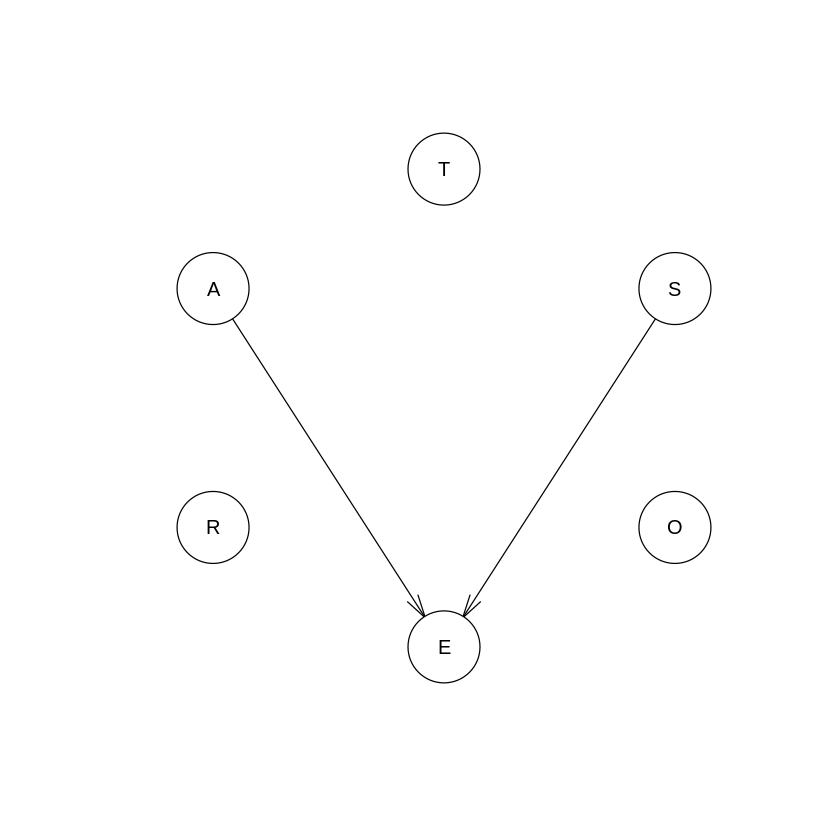

In [12]:
plot(dag)

El nivel de educaci√≥n tiene una fuerte influencia en la ocupaci√≥n del individuo, as√≠ como en su lugar de residencia:

In [13]:
dag <- set.arc(dag, from = "E", to = "O") 
dag <- set.arc(dag, from = "E", to = "R")

Finalmente, los medios de transporte preferidos por el individuo est√°n directamente influidos por su lugar de residencia y su ocupaci√≥n. En cuanto al primer factor, la distancia al lugar de trabajo desde la residencia influye directamente en la opci√≥n de transporte. Por otra parte, algunos trabajos requieren viajes peri√≥dicos de larga distancia, mientras que otros requieren trayectos m√°s frecuentes sobre cortas distancias.

In [14]:
dag <- set.arc(dag, from = "R", to = "T")
dag <- set.arc(dag, from = "O", to = "T")

Finalmente, queda definido el grafo como:

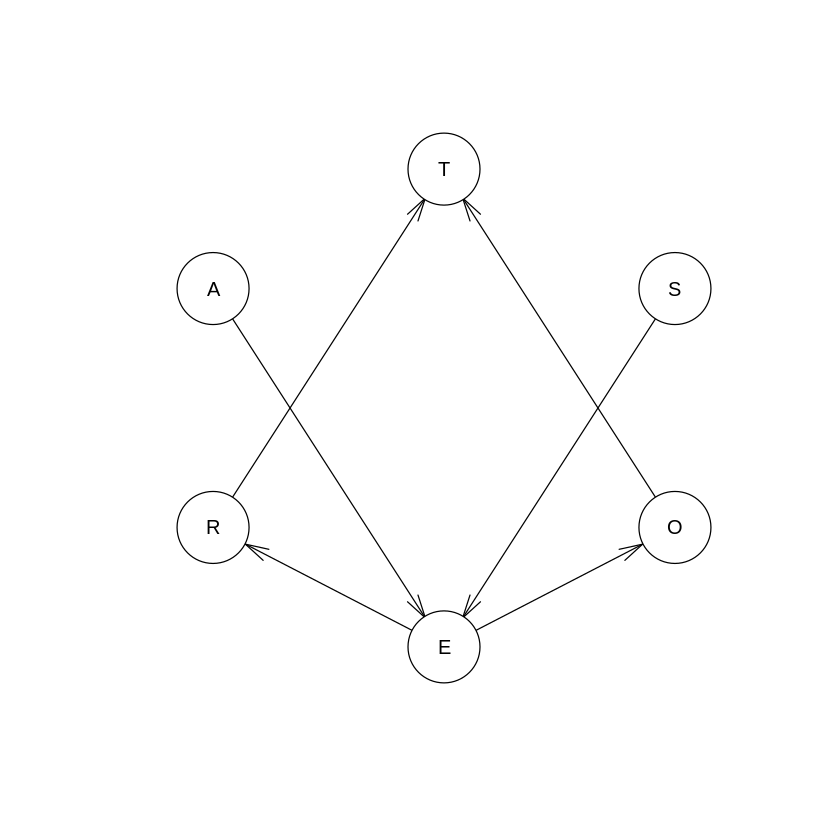

In [15]:
plot(dag)

In [16]:
#::GMG::Hemos definido los arcos
dag$arcs

from to
[1,] A    E 
[2,] S    E 
[3,] E    O 
[4,] E    R 
[5,] R    T 
[6,] O    T

In [17]:
#::GMG::Y los nodos
dag$nodes

$A
$A$mb
[1] "E" "S"

$A$nbr
[1] "E"

$A$parents
character(0)

$A$children
[1] "E"


$R
$R$mb
[1] "E" "O" "T"

$R$nbr
[1] "E" "T"

$R$parents
[1] "E"

$R$children
[1] "T"


$E
$E$mb
[1] "A" "R" "O" "S"

$E$nbr
[1] "A" "R" "O" "S"

$E$parents
[1] "A" "S"

$E$children
[1] "R" "O"


$O
$O$mb
[1] "R" "E" "T"

$O$nbr
[1] "E" "T"

$O$parents
[1] "E"

$O$children
[1] "T"


$S
$S$mb
[1] "A" "E"

$S$nbr
[1] "E"

$S$parents
character(0)

$S$children
[1] "E"


$T
$T$mb
[1] "R" "O"

$T$nbr
[1] "R" "O"

$T$parents
[1] "R" "O"

$T$children
character(0)

Esta es la definici√≥n simb√≥lica del grafo:

In [18]:
modelstring(dag)

[1] "[A][S][E|A:S][R|E][O|E][T|R:O]"

De este modo, las dependencias de cada variable quedan definidas por la barra vertical (`|`) que usamos habitualmente para la f√≥rmula de probabilidad condicionada y separadas por dos puntos `:`. Por ejemplo, `[E|A:S]` significa que se dan los arcos $A‚ÜíE$ y $S‚ÜíE$ (sexo y edad son *padres* de empleo). Esta notaci√≥n se asemeja por tanto a un producto de probabilidades condicionadas, del tipo $P(E | A,S)$, lo que concuerda con el hecho de que cada una de ellas es un *factor de la descomposici√≥n* en la *distribuci√≥n global* hecha por nuestro grafo `dag`:

$P_{dag}\left(A,S,E,O,R,T\right) = P(A)P(S)P(E | A,S)P(O | E)P(R | E)P(T | O,R)$

Otras funciones √∫tiles para explorar objetos de la clase bn son por ejemplo nodesy arcs:

In [19]:
#::GMG::muchas de las estructuras de la clase bn se pueden obtener 
#       de manera funcional con una visi√≥n simplificada
nodes(dag)

[1] "A" "R" "E" "O" "S" "T"

In [20]:
arcs(dag)

from to
[1,] A    E 
[2,] S    E 
[3,] E    O 
[4,] E    R 
[5,] R    T 
[6,] O    T

### 2.2 Otra manera de definir el DAG

La forma anterior define arcos uno a uno, pero tambi√©n podemos definir la estructura toda a la vez. La funci√≥n `arcs()` es especialmente interesante ya que nos permite a√±adir arcos de manera m√°s r√°pida. En este caso, se podr√≠an definir las relaciones mediante una matriz de dos columnas similar a la devuelta por `arcs()`:

In [21]:
dag2 <- empty.graph(nodes = c("A", "S", "E", "O", "R", "T"))
arc.set <- matrix(c("A", "E",
                    "S", "E",
                    "E", "R",
                    "E", "O",
                    "O", "T",
                    "R", "T"),
                  byrow = TRUE, ncol = 2,
                  dimnames = list(NULL, c("from", "to"))
                 )
arcs(dag2) <- arc.set

El grafo resultante es id√©ntico al que se gener√≥ anteriormente:

In [22]:
all.equal(dag, dag2)

[1] TRUE

Ambas formas de definir el grafo garantizan que √©ste sea ac√≠clico, ya que si se intenta introducir un ciclo en el mismo se producir√° un error. Por ejemplo, si intentamos crear una relaci√≥n directa entre `T` y `E`, lo que dar√≠a lugar a un ciclo, se produce un error:

In [23]:
set.arc(dag, from = "T", to = "E")

ERROR: Error in arc.operations(x = x, from = from, to = to, op = "set", check.cycles = check.cycles, : the resulting graph contains cycles.


### Ejercicio 1.1

Construye un grafo razonable que modelice el conjunto de datos almacenados en coronary, que contiene las causas probables de factores de riesgo en trombosis coronaria, con las variables:

 - Smoking: Fumador. Factores: no/yes .
 - M. Work: Trabajo mental estresante. Factores: no/yes .
 - P. Work: Trabajo f√≠sico estresante. Factores: no/yes
 - Pressure: Tensi√≥n sist√≥lica. Factores: <140/>140
 - Proteins: Ratio de lipoproteinas alfa y beta. Factores: <3/>3.
 - Family: Familiar con enfermedad coronaria: Factores: neg/pos
 
**::GMG::** La [soluci√≥n](http://www.bnlearn.com/documentation/man/coronary.html) parcial (grafo no dirigido) est√° en la documentaci√≥n de referencia de `bnlearn` que incluye el dataset `coronary` en el que se tienen las caracter√≠sticas que se indican en el ejercicio.

In [24]:
#::GMG::El dataset coronary
str(coronary)

'data.frame':	1841 obs. of  6 variables:
 $ Smoking : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ M. Work : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ P. Work : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ Pressure: Factor w/ 2 levels "<140",">140": 1 1 1 1 1 1 1 1 1 1 ...
 $ Proteins: Factor w/ 2 levels "<3",">3": 1 1 1 1 1 1 1 1 1 1 ...
 $ Family  : Factor w/ 2 levels "neg","pos": 1 1 1 1 1 1 1 1 1 1 ...


In [25]:
#::GMG::Ejemplo (soluci√≥n) de la documentaci√≥n
# http://www.bnlearn.com/documentation/man/coronary.html
# This is the undirected graphical model from Whittaker (1990).
#data(coronary)
#::nota::es interesante la manera de sacar el nombre de los nodos
#        del dataset
ug <- empty.graph(names(coronary))

In [26]:
#::GMG::En clase nos han indicado que no es una buena idea poner
#       nodos con nombres con espacios y la extracci√≥n no names()
#       los elimina (!!)
nodes(ug)

[1] "Smoking"  "M. Work"  "P. Work"  "Pressure" "Proteins" "Family"

In [27]:
#::GMG::La funci√≥n arcs() tambi√©n se puede usar para crear
#       los arcos (!!)
#::nota::al poner las dos direcciones de un arco se le hace
#        no dirigido
#::PTE::con asunciones (razonamientos) parecidos a los usados con
#       el dag de survey 
arcs(x = ug, check.cycles = FALSE) = matrix(
  c("Family", "M. Work", "M. Work", "Family",
    "M. Work", "P. Work", "P. Work", "M. Work",
    "M. Work", "Proteins", "Proteins", "M. Work",
    "M. Work", "Smoking", "Smoking", "M. Work",
    "P. Work", "Smoking", "Smoking", "P. Work",
    "P. Work", "Proteins", "Proteins", "P. Work",
    "Smoking", "Proteins", "Proteins", "Smoking",
    "Smoking", "Pressure", "Pressure", "Smoking",
    "Pressure", "Proteins", "Proteins", "Pressure"),
  ncol = 2, byrow = TRUE,
  dimnames = list(c(), c("from", "to")))

In [28]:
#::GMG::Aqu√≠ se hace uso de graphviz para "embellecer" el resultado :)
#library('Rgraphviz')

In [29]:
#graphviz.plot(ug, shape = "ellipse")

### Ejercicio 1.2

Hemos utilizado la funci√≥n `arcs()`, pero se puede acceder a la estructura de arcos mediante `dag$arcs`. A√±ade un arco al grafo del *Ejercicio 1* modificando manualmente esta estructura y observa lo que ocurre para las funciones `parents()`, etc‚Ä¶

**::GMG::** En cierta manera esto ya lo he hecho con `dag` ... ;)

### 2.3 Construcci√≥n de las tablas de probabilidad condicionada

#### 2.3.1 Definici√≥n de los estados de las variables

Una vez representadas las interacciones entre variables mediante el grafo, es necesario especificar una distribuci√≥n de probabilidad conjunta sobre todas las variables para obtener el modelo bayesiano de los datos de la encuesta. Todas ellas, como se dijo al principio, son variables discretas y definidas para una serie de estados ordenados (categor√≠as, o levels en R), que se definen a continuaci√≥n:

In [30]:
#::GMG::Recuerdo como es el dataset
# Age (A), Residence (R), Education (E), Ocupation (O), Sex (S), Transportation (T)
survey <- read.table('../data/survey.txt', header = TRUE)
head(survey)

A     R     E    O   S T    
1 adult big   high emp F car  
2 adult small uni  emp M car  
3 adult big   uni  emp F train
4 adult big   high emp M car  
5 adult big   high emp M car  
6 adult small high emp F train

In [31]:
str(survey)

'data.frame':	500 obs. of  6 variables:
 $ A: Factor w/ 3 levels "adult","old",..: 1 1 1 1 1 1 1 3 3 2 ...
 $ R: Factor w/ 2 levels "big","small": 1 2 1 1 1 2 1 1 1 1 ...
 $ E: Factor w/ 2 levels "high","uni": 1 2 2 1 1 1 1 2 1 2 ...
 $ O: Factor w/ 2 levels "emp","self": 1 1 1 1 1 1 1 1 1 1 ...
 $ S: Factor w/ 2 levels "F","M": 1 2 1 2 2 1 1 1 2 1 ...
 $ T: Factor w/ 3 levels "car","other",..: 1 1 3 1 1 3 1 3 1 1 ...


In [32]:
levels(survey$T)

[1] "car"   "other" "train"

In [33]:
levels(survey$A)

[1] "adult" "old"   "young"

In [34]:
#::GMG:: estado de los nodos para las tablas de probabilidad (CPT)
estados.A <- c("young", "adult", "old")
estados.S <- c("M", "F")
estados.E <- c("high", "uni")
estados.O <- c("emp","self")
estados.R <- c("small","big")
estados.T <- c("car","train","other")

In [35]:
estados.A

[1] "young" "adult" "old"

En este caso, la distribuci√≥n de probabilidad conjunta o global (**JPD, Joint Probability Distribution**), que denotamos con $P(X)$, tiene **3‚àó2‚àó2‚àó2‚àó2‚àó3** = 144 estados, y por tanto **3‚àó2‚àó2‚àó2‚àó2‚àó3‚àí1** = 143 *par√°metros*, que son las combinaciones resultantes, y esto tan solo con un modelo de 6 variables, varias de las cuales son binarias.

**::GMG::** la f√≥rmula para los par√°metros tiene in "-1" porque el √∫ltimo estado est√° fijo una vez contados los anteriores

En su lugar, y aprovech√°ndonos de nuestro conocimiento sobre el conjunto de datos (conocimiento experto, a priori) hemos utilizado un modelo mucho menos complejo a nivel de par√°metros, descartando muchas relaciones entre variables que sabemos a priori que no tienen sentido (e.g. la relaci√≥n entre la edad A y el sexo S del encuestado).

Las variables que no se encuentran unidas por ning√∫n arco se dice que son *condicionalmente independientes*. Por lo tanto, la factorizaci√≥n representada por la ecuaci√≥n anterior es un *submodelo* de la distribuci√≥n global que contiene muchos menos par√°metros.

In [36]:
#::GMG::Recordar que la factorizaci√≥n que representa el grafo la podemos
#       obtener con
modelstring(dag)

[1] "[A][S][E|A:S][R|E][O|E][T|R:O]"

Llevado a nuestro ejemplo, el n√∫mero de par√°metros necesarios para definir la JPD en nuestro ejemplo es, gracias al DAG y denotando $\mathcal B$ la red bayesiana definida por `dag`,

$P_{\mathcal B}(A,S,E,O,R,T) = P(A)_2P(S)_1P(E|A,S)_{1‚ãÖ(3‚ãÖ2)}P(O|E)_{1‚ãÖ2}P(R|E)_{1‚ãÖ2}P(T|O,R)_{2‚ãÖ(2‚ãÖ2)}$,

**2+1+6+2+2+8** = 21 par√°metros (Obs√©rvese como el n√∫mero de par√°metros crece exponencialmente con el n√∫mero de padres), con la idea de que $P_B$ se ajuste suficientemente bien a la JPD, i.e. $P_{\mathcal B} \approx P$, y lo que sigue por tanto es definir esos par√°metros.

**::GMG::** Para la notaci√≥n matem√°tica me est√° resultando √∫til [este enlace](https://en.wikibooks.org/wiki/LaTeX/Mathematics).

#### 2.3.2 Definici√≥n de las Tablas de Probabilidad Condicionada

Las *Tablas de Probabilidad Condicionada* (**CPT**) de cada variable viene dada por una funci√≥n de probabilidad *para cada combinaci√≥n de estados de los padres*, i.e. para un nodo $X$
necesitamos definir las tablas de probabilidad $P(X | Œ†(X))$, quedando definida la funci√≥n de probabilidad conjunta como 

$P_{dag}(\mathcal X) = ‚àè_{pi = 1}^P (X_i | Œ†(X_i))$, 

donde $Œ†(X)$ son los padres de $X$.

Dado que las probabilidades condicionales pueden ser unidimensionales o venir en forma de tablas de varias dimensiones dependiendo del n√∫mero de padres de cada nodo, utilizaremos para crear dichas probabilidades la funci√≥n `array()`, que permite utilizar una interfaz com√∫n en todos los casos (`matrix()` es simplemente un elemento de tipo `array()` de dos dimensiones).

En la encuesta, la *edad* y el *sexo* vienen dadas por probabilidades unidimensionales, ya que son variables que no tienen padres en el grafo. S√≥lo tenemos por tanto que especificar sus marginales:

**::GMG::** Esto no se tiene por qu√© hacer a mano y se puede [deducir del dataset](http://www.bnlearn.com/examples/custom/) (!)

In [37]:
#::nota::Esta celda da un error con el comando comentado
# ERROR while rich displaying an object: Error in dn[[2L]]: subscript out of bounds
# https://github.com/IRkernel/IRkernel/issues/590
# the object is an 1D-array with dimnames. repr_latex fails on it 
# which is why you see an error and output.
# A.prob <- array(data = c(.3, .5, .2), 
#                dim = 3, 
#                dimnames = list(A = estados.A)
#               )
# A.prob
#::nota::lo hago como lo hacen bnlearn
# http://www.bnlearn.com/examples/custom/
# A.prob <- matrix(c(.3, .5, .2), ncol = 3, dimnames = list(NULL, estados.A))
# 
A.prob <- array(data = c(.3, .5, .2), 
                dim = 3, 
                dimnames = list(A = estados.A)
               )
print(A.prob)

A
young adult   old 
  0.3   0.5   0.2 


In [38]:
#::GMG::El resultado es el mismo pero el problema es si se intenta
#       imprimir en una celda sin el print() (!)
S.prob <- array(c(.6, .4), 
                dim = 2, 
                dimnames = list(S = estados.S))
print(S.prob)

S
  M   F 
0.6 0.4 


*ocupaci√≥n* y *residencia*, al depender de educaci√≥n, se representan mediante una tabla de probabilidades condicionadas de dos dimensiones, i.e. necesitamos definir una probabilidad para cada estado del padre. Cada columna por tanto en este caso representa cada uno de los niveles del padre, manteniendo la distribuci√≥n de la variable condicionada cada nivel particular, por lo que las probabilidades de cada columna siempre suman 1 (i.e. son una probabilidad):

In [39]:
O.prob <- array(c(.96,.04,.92,.08), 
                dim = c(2,2), 
                dimnames = list(O = estados.O, E = estados.E))
print(O.prob)

      E
O      high  uni
  emp  0.96 0.92
  self 0.04 0.08


In [40]:
R.prob <- array(c(.25,.75,.2,.8), 
                dim = c(2,2), 
                dimnames = list(R = estados.R, E = estados.E))
print(R.prob)

       E
R       high uni
  small 0.25 0.2
  big   0.75 0.8


Por √∫ltimo, *educaci√≥n* y *transporte* se modelizan en forma de tablas 3-dimensionales, dado que tienen 2 padres cada una y se debe especificar por tanto una probabilidad para cada estado de, en este caso, los 2 padres.

La primera dimensi√≥n debe ser el nodo en s√≠, y a continuaci√≥n se listan los padres. De manera que cada selecci√≥n de las dem√°s dimensiones (2,...) corresponde a un estado de los padres, y por tanto produce una probabilidad.

In [41]:
E.prob <- array(c(.75, .25, .72, .28, .88, .12, .64, .36, .70, .30, .90, .10),
                dim = c(2, 3, 2),
                dimnames = list(E = estados.E,
                                A = estados.A,
                                S = estados.S))
print(E.prob)

, , S = M

      A
E      young adult  old
  high  0.75  0.72 0.88
  uni   0.25  0.28 0.12

, , S = F

      A
E      young adult old
  high  0.64   0.7 0.9
  uni   0.36   0.3 0.1



In [42]:
T.prob <- array(c(.48, .42, .1, .56, .36, .08, .58, .24, .18, .7, .21, .09),
                dim = c(3,2,2),
                dimnames = list(T = estados.T, 
                                O = estados.O,
                                R = estados.R))
print(T.prob)

, , R = small

       O
T        emp self
  car   0.48 0.56
  train 0.42 0.36
  other 0.10 0.08

, , R = big

       O
T        emp self
  car   0.58 0.70
  train 0.24 0.21
  other 0.18 0.09



Recu√©rdese que en `R` podemos seleccionar utilizando directamente el nombre, e.g. si queremos conocer la distribuci√≥n de empleo para las ‚Äúmujeres‚Äù de edad ‚Äúadulta‚Äù,

In [43]:
#::GMG::Tengo que aprender a sacar consultas de ese tipo porque seguro que salen
#       en el examen
E.prob[,"adult","F"]

high  uni 
 0.7  0.3

O tal vez queramos determinar c√≥mo cambia la distribuci√≥n entre gente con tama√±o de poblaci√≥n de residencia ‚Äúpeque√±a‚Äù y ‚Äúgrande‚Äù:

In [44]:
T.prob[,,"small"] - T.prob[,,"big"]

O
T       emp   self 
  car   -0.10 -0.14
  train  0.18  0.15
  other -0.08 -0.01

Una vez definidos el grafo y la distribuci√≥n de las probabilidades locales de cada variable, se combinan para crear la red bayesiana propiamente dicha. Como estamos creando las tablas manualmente (m√°s tarde veremos c√≥mo hacerlo de manera autom√°tica), utilizaremos la funci√≥n `custom.fit()`, que requiere el DAG (clase bn) y una lista en la que se almacenan las diferentes tablas de probabilidades condicionadas, en la que cada elemento lleva el nombre de la variable correspondiente (la llamamos **cpt**, de *Conditional Probability Tables*):

In [45]:
cpt <- list(A = A.prob, S = S.prob, E = E.prob, O = O.prob, R = R.prob, T = T.prob)

El [objeto bn](http://www.bnlearn.com/documentation/man/bn.fit.class.html) es la red bayesiana propiamente dicha, contiene el grafo y las tablas de probabilidad asociadas a cada nodo. Para bnlearn es un objeto de las clases `bn.fit` y `bn.fit.dnet`, es decir, es una ‚Äú*red bayesiana ajustada a unos datos*‚Äù.

In [46]:
bn <- custom.fit(x = dag, dist = cpt)

In [47]:
# http://www.bnlearn.com/documentation/man/bn.class.html
# http://www.bnlearn.com/documentation/man/bn.fit.class.html
class(bn)

[1] "bn.fit"      "bn.fit.dnet"

## 3 Consultas al grafo

La utilidad de la red probabil√≠stica radica en √∫ltimo t√©rmino hallar de forma eficiente la probabilidad de cualquier nodo (o conjunto de nodos), dada una cierta informaci√≥n (*evidencia*). Este proceso se denomina *inferencia o razonamiento probabil√≠stico*. Sin embargo, el grafo en s√≠ tambi√©n proporciona informaci√≥n cualitativa de nuestro conjunto de variables.

De la primera parte nos encargaremos en la siguiente pr√°ctica, por ahora nos centraremos en la parte cualitativa, con el objetivo de responder a preguntas del tipo ¬ø*Son dos variables independientes dado un conjunto de variables*? B√°sicamente, le plantearemos cuestiones de independencia a nuestra red bayesiana, como si de un sistema experto se tratara.

### 3.1 Extraer propiedades b√°sicas del grafo

#### 3.1.1 N√∫mero de par√°metros de la factorizaci√≥n

Como se dijo anteriormente, el *n√∫mero de par√°metros* (**21**) de la red es *mucho menor* que el de la distribuci√≥n de probabilidades global, que era de **143**. Puede consultarse cu√°ntos par√°metros tiene la red con `nparams()`:

In [48]:
nparams(bn)

[1] 21

#### 3.1.2 Arcos, nodos y estructuras gr√°ficas

Del objeto resultante que contiene la definici√≥n de la red bayesiana pueden extraerse diversos par√°metros referentes a la estructura del grafo, adem√°s de los arcos, `arcs()`, que ya hemos visto anteriormente.

In [49]:
# Arcos
arcs(bn)

from to
[1,] A    E 
[2,] R    T 
[3,] E    R 
[4,] E    O 
[5,] O    T 
[6,] S    E

In [50]:
# Nodos
nodes(bn)

[1] "A" "R" "E" "O" "S" "T"

In [51]:
# Padres de un determinado nodo
bnlearn::parents(bn, "E")

[1] "A" "S"

In [52]:
bnlearn::parents(bn, "A")

character(0)

In [53]:
# Hijos
bnlearn::children(bn, "A")

[1] "E"

Como se ha visto anteriormente, existen en esencia tres tipos de configuraciones en un DAG:

  1. $X \to Y \to Z$ (*Estructura en serie o cascada*) $\implies X \bot_P Z \mid Y$.
  2. $X \gets Y \to Z$ (*Padre en com√∫n o divergentes*) $\implies X \bot_P Z \mid Y$.
  3. $X \to Y \gets Z$ (*Estructura en V*) $\implies X \bot_P Z, X not \bot_P Z \mid Y$.
  
**::GMG::** [List of mathematical symbols](https://en.wikibooks.org/wiki/LaTeX/Mathematics#List_of_mathematical_symbols) and [Jupyter Notebook Math examples](https://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Typesetting%20Equations.html?highlight=math).

Las dos primeras estructuras codifican la misma *d-separaci√≥n*, ya que los nodos $X$ y $Z$ con *condicionalmente independientes dado Y* (se suele decir que Y ‚Äú*bloquea*‚Äù la uni√≥n entre $X$ y $Z$). El tercer caso es el de la **v-estructura**, que indica que $X$ y $Z$ son *independientes*, sin embargo, si no se da Y, los nodos X y Z son *dependientes*.

A continuaci√≥n se muestra cada uno de los casos para la red creada:

  1. ![cadena](graph-chain-structure.png)
  2. ![padre-hijo](graph-father-son.png)
  3. ![v-structura](graph-v-structure.png)

El comando `vstructs` sirve para comprobar las v-estructuras presentes en el grafo:

In [54]:
vstructs(dag)

X Z Y
[1,] A E S
[2,] R T O

In [55]:
#::GMG:: Se puede ser m√°s detallado e incluir las v-estructuras "morales"
vstructs(x = dag, moral = TRUE, debug = TRUE)

* scanning the graph (step 1).
  > node E is the center of a v-structure.
  > node T is the center of a v-structure.
* marking v-structures (step 2).
  > fixing arc A -> E, it's part of a v-structure.
  > fixing arc S -> E, it's part of a v-structure.
  > fixing arc R -> T, it's part of a v-structure.
  > fixing arc O -> T, it's part of a v-structure.


X Z Y
[1,] A E S
[2,] R T O

En este caso, tanto $A-E-S$ como $O-T-R$ forman v-estructuras.

#### 3.1.3 Vecindad y *Markov Blanket*

La vecindad (*neighborhood*, `nbr`) y la *Markov blanket* (`mb`) de un nodo proporcionan una descripci√≥n sint√©tica de la estructura de *dependencia local* alrededor de un nodo. La vecindad es los nodos a los que est√° *conectado*.

Intuitivamente, la Markov Blanket $\mathcal M \subset \mathcal X$ de un nodo $X$ es el conjunto minimal de nodos que ‚Äú*separa*‚Äù $X$ del resto, i.e. $X \bot P \left(\mathcal X ‚àí \mathcal M ‚àí \mathcal X\right) \mid \mathcal M$, y como sabemos, es el conjunto formado por sus padres, sus hijos y esposas (padres de sus hijos).

![mb del nodo O](mb.png)

*Markov Blanket del nodo ‚ÄòO‚Äô de la red bayesiana, indicada por los nodos en gris. La vecindad de ‚ÄòO‚Äô est√° representada por los nodos con bordes rojos, padre e hijo, mientras que la esposa ‚ÄòR‚Äô se muestra en negro.*

Se obtiene esta informaci√≥n con los comandos `nbr` (*neighbourhood*):

In [56]:
nbr(dag, "O")

[1] "E" "T"

y `mb` (*markov blanket*):

In [57]:
mb(dag, "O")

[1] "R" "E" "T"

Tambi√©n podemos utilizar los comandos anteriores para mostrar que ambos sets describen una relaci√≥n sim√©trica, por ejemplo, si `R` est√° en la manta de Markov de `O`, `O` estar√° en la de `R`:

In [58]:
"R" %in% mb(dag, "O")

[1] TRUE

In [59]:
"O" %in% mb(dag, "R")

[1] TRUE

Adem√°s, podemos verificar f√°cilmente como la Markov blanket de un nodo cualquiera (`O` en este ejemplo), est√° compuesta por sus hijos (objeto `child`), sus padres (objeto `par`), y las esposas (objeto `o.par`), por su propia definici√≥n:

In [60]:
child <- bnlearn::children(dag, "O")
child

[1] "T"

In [61]:
par <- bnlearn::parents(dag, "O")
par

[1] "E"

In [62]:
o.par <- sapply(child, bnlearn::parents, x = dag)
o.par

T
[1,] R
[2,] O

In [63]:
unique(c(par, child, o.par[o.par != "O"]))

[1] "E" "T" "R"

In [64]:
mb(dag, "O")

[1] "R" "E" "T"

Recu√©rdese que, en general, toda esta informaci√≥n est√° contenida en el propio objeto, es decir, podemos ver, por ejemplo, la *Markov Blanket* de un nodo, haciendo

In [65]:
dag$nodes$A$mb

[1] "E" "S"

In [66]:
dag$nodes$O$mb

[1] "R" "E" "T"

### Ejercicio 2

  1. Haz que A pertenezca a la Markov Blanket de `O` sin hacer `A` padre de `O`.

  2. Por inspecci√≥n visual. ¬øSe ha eliminado alguna independencia?

  3. ¬øCu√°l es la nueva JPD $P_{dag}$?

Configura el grafo como estaba antes de este ejercicio.

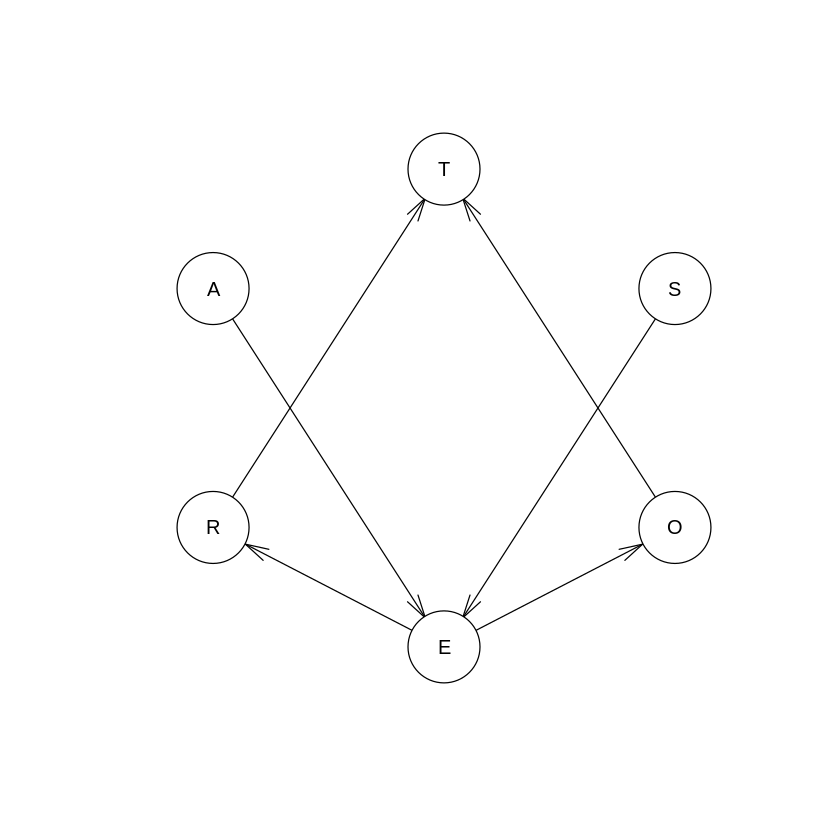

In [67]:
plot(dag)

In [68]:
# consultas al grafo (no de inferencia)
# x -> y -> z => P(x)p(y/x)p(z/y); x <- y -> z => P(y) p(x/y) P(z/y)
# d-separation => independence becasuse it's an I-graph 
# en el ejercicio 

In [69]:
#::GMG::ejercicio 2: Haz que A pertenezca a la Markov Blanket de O sin hacer A padre de O. 
#::nota::a√±adir un arco de A a T
# http://www.bnlearn.com/documentation/man/arcops.html
dag <- set.arc(dag,from = 'A', to = 'T')

In [70]:
mb(dag, "O")

[1] "A" "R" "E" "T"

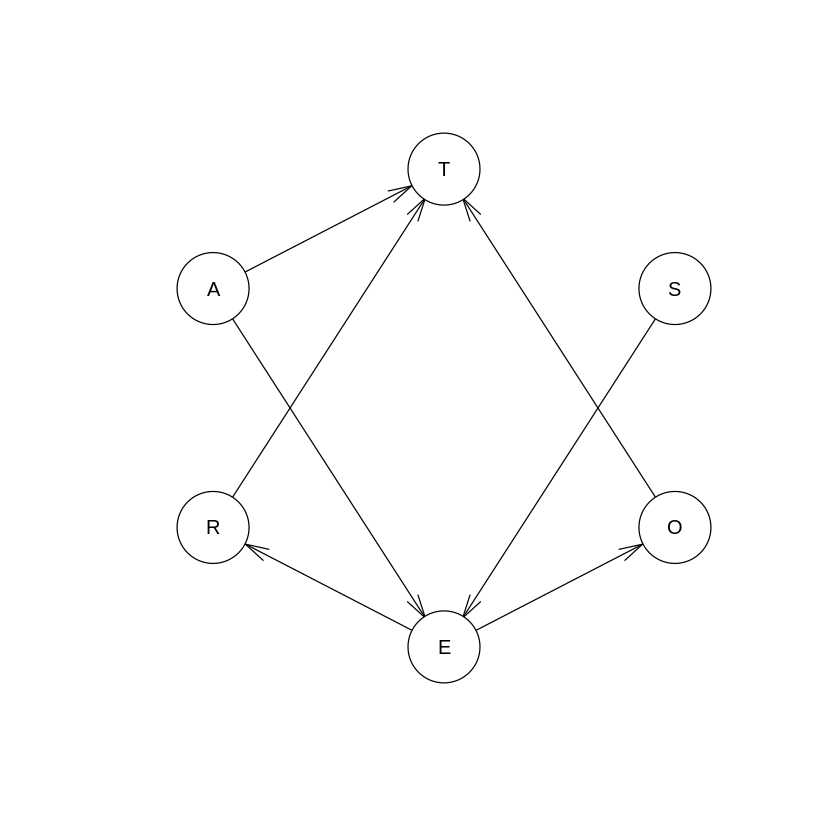

In [71]:
plot(dag)

In [72]:
#::GMG::¬øse ha creado una nueva independencia?
# dsep (A, O) dado E; dsep(A, O) dado E,T (E=e, T = t); al a√±adir A -> T NO se cumple los dsep
#::nota:: Un ejemplo que clarifica esto ... iq -> nota <- dif => iq not dsep | nota
# http://www.bnlearn.com/documentation/man/dsep.html
dsep(bn = dag, x = 'A' , y = 'O', z = c('E', 'T'))

[1] FALSE

In [73]:
#::GMG::¬øCu√°l es la nueva JPD ùëÉùëëùëéùëî?
# http://www.bnlearn.com/documentation/man/modelstring.html
#::nota:: la factorizaci√≥n nueva com p(T/A) como factor
modelstring(dag)

[1] "[A][S][E|A:S][R|E][O|E][T|A:R:O]"

In [74]:
#::GMG:: Configura el grafo como estaba antes de este ejercicio.
dag <- drop.arc(dag,from = 'A', to = 'T')

In [75]:
dsep(bn = dag, x = 'A' , y = 'O', z = c('E', 'T'))

[1] TRUE

#### 3.1.4 Matriz de adyacencia

Tambi√©n podemos obtener la matriz de adyacencia de forma directa con `amat`, que es otro modo de especificar las uniones entre nodos:

In [76]:
# http://www.bnlearn.com/documentation/man/mb.html
amat(dag)

A R E O S T
A 0 0 1 0 0 0
R 0 0 0 0 0 1
E 0 1 0 1 0 0
O 0 0 0 0 0 1
S 0 0 1 0 0 0
T 0 0 0 0 0 0

De hecho, dado un conjunto de nodos y la matriz de adyancencia (que podr√≠a contruirse a mano o ser importada desde otro formato), es posible definir un DAG completamente:

In [77]:
mat <- amat(dag)
dag3 <- empty.graph(nodes(dag))
amat(dag3) <- mat
all.equal(dag, dag3)

[1] TRUE

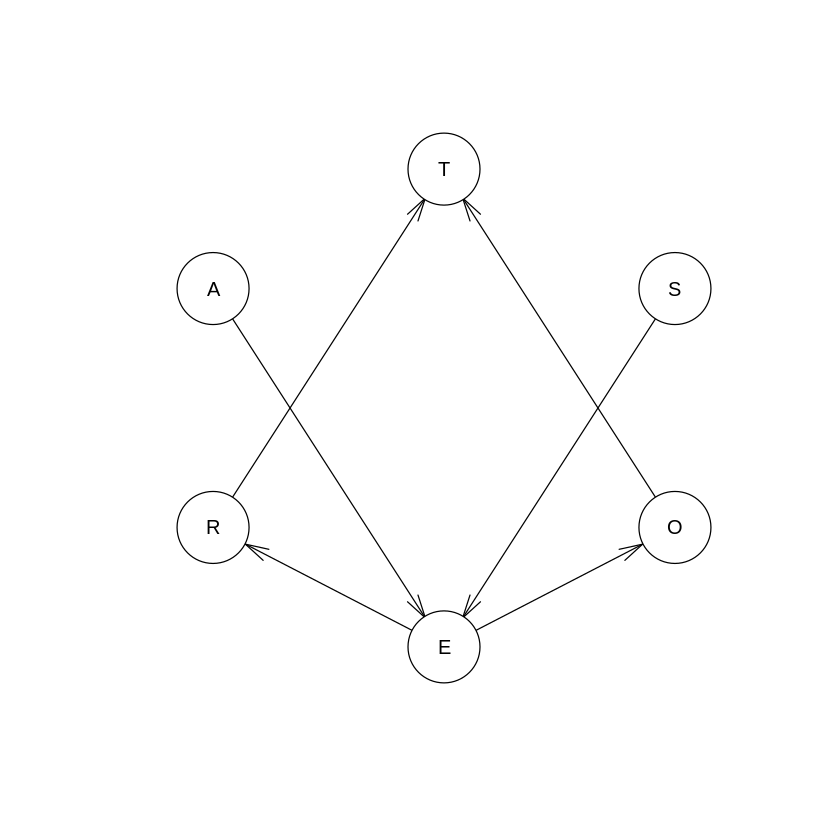

In [78]:
plot(dag3)

### 3.2 Consultas de independencia al DAG: d-separaci√≥n

Podemos estudiar la asociaci√≥n entre variables con la informaci√≥n contenida en nuestro grafo, almacenado en el objeto dag, mediante *consultas de d-separaci√≥n*. Esto es posible mediante un an√°lisis entre las conexiones del DAG, para comprobar si existe alguna conexi√≥n entre ellas, bien sea directa o indirecta, dependiendo de si la relaci√≥n entre las dos variables est√° mediada por uno o m√°s arcos respectivamente.

Si *no existe* dicha conexi√≥n entre las variables en el grafo, hablamos de separaci√≥n dirigida, o **d-separaci√≥n**. Los detalles de la d-separaci√≥n ya se han visto anteriormente. En esta pr√°ctica, basta con recordar que la d-separaci√≥n de dos variables ($\bot_G$) en la red bayesiana implica independencia probabil√≠stica ($\bot_P$). Recu√©rdese por tanto que si todas las trayectorias (*trails*) entre $X$ e $Y$ se encuentran bloqueadas por $Z$, se dice que $X$ e $Y$ son *(condicionalmente) independientes* dada variable $Z$, lo que representamos como $X \bot_G Y \mid Z$. Lo contrario *no es necesariamente cierto*: no todas las relaciones de independencia condicional se encuentran reflejadas en el grafo.

Podemos investigar la *d-separaci√≥n* entre variables de un grafo con la funci√≥n `dsep`:

In [79]:
# http://www.bnlearn.com/documentation/man/dsep.html
# https://math.stackexchange.com/questions/655589/what-is-difference-between-cycle-path-and-circuit-in-graph-theory
dsep(dag, x = "S", y = "R")

[1] FALSE

In [80]:
dsep(dag, x = "O", y = "R")

[1] FALSE

En los anteriores ejemplos las variables introducidas no son independientes. Esto podemos verlo en el grafo, donde el sexo (`S`) y el lugar de residencia (`R`) est√°n conectados a trav√©s de educaci√≥n (`E`). Del mismo modo, la ocupaci√≥n (`O`) y el lugar de residencia (`R`) est√°n relacionadas a trav√©s de la educaci√≥n (`E`).

De hecho, podemos comprobar que hay una conexi√≥n entre `S` y `R` el el DAG:

In [81]:
dsep(dag, x = "S", y = "R")

[1] FALSE

i.e. no est√°n d-separados, pero si *condicionamos* a la educaci√≥n, la conexi√≥n queda bloqueada y `S` y `R` son ahora independientes:

In [82]:
dsep(dag, x = "S", y = "R", z = "E")

[1] TRUE

Lo mismo aplica a la relaci√≥n entre `O` y `R`. Ambas dependen de `E`, y por lo tanto ambas se vuelven independientes cuando condicionamos sobre `E`:

In [83]:
dsep(dag, "O", "R", "E")

[1] TRUE

Por el contrario, condicionar sobre un nodo particular puede tambi√©n hacer que otros nodos marginalmente independientes pasen a ser dependientes. Por ejemplo,

In [84]:
#::GMG:: A y S forman una v-estructura que si se activa (evidencia E) rompe el enlace
#::nota::es lo contrario de lo que pasa con las otras estructuras de cadena o padre-hijo
dsep(dag, x = "A", y = "S")

[1] TRUE

In [85]:
dsep(dag, x = "A", y = "S", z = "E")

[1] FALSE

Efectivamente, se trata de una **v-estructura**. Si queremos hacer inferencia sobre el nodo `A` en este caso, necesitaremos adem√°s informaci√≥n sobre los nodos `S` y `E`. Este *subconjunto de nodos* constituye el *Markov blanket* de `A`, siendo el resto de los nodos del grafo *redundantes* para hacer inferencia sobre `A`:

In [86]:
mb(dag, "A")

[1] "E" "S"

Sabemos a partir del grafo que el estado de `E` esta influenciado por los estados de `A` y `S`, que son sus padres.

In [87]:
parents(dag, "E")

[1] "A" "S"

A su vez, `A` y `S` pasan a ser dependientes dado `E`. De forma equivalente, `E` depende de la distribuci√≥n conjunta de `A` y `S`, $P\left(E \mid A,S\right)$; por tanto, de acuerdo con el **Teorema de Bayes**, tenemos:

$P\left(E \mid A,S\right) = \frac {P\left(A,S,E\right)}{P\left(A,S\right)} = \frac {P(A,S \mid E)P(E)}{P(A)P(S)} \propto P(A,S \mid E)$

y por lo tanto cuando `E` es conocida, no podemos descomponer la probabilidad conjunta de `A` y `S` en una parte que dependa s√≥lo de `A` y otra de `S`. No obstante, $P(A,S) = P(A \mid S)P(S) = P(A)P(S)$: tal y como se ha visto en el ejemplo anterior, `A` y `S` est√°n d-separadas cuando no se condiciona a `E`.

In [88]:
#::GMG:: Ejemplos vistos en clase ---> S01_Bayesian_Networks.pdf (S83-84)
# S and R d¬≠separated?
dsep(dag, x = "S", y = "R")

[1] FALSE

In [89]:
# Is there a path between S and R?
path(dag, from = "S", to = "R")

[1] TRUE

In [92]:
# Given E, are S and R d¬≠separated?
dsep(dag, x = "S", y = "R", z = "E")

[1] TRUE

### Ejercicio 3

Carga el grafo del archivo grafo_`ejercicio3.rda`, que contiene la variable `dag.3`. Dib√∫jalo y responde a las siguientes preguntas sobre √©l:

  1. ¬øSon Z y U independientes?
  2. ¬øSon Z y U dependientes?
  3. ¬øSon T y U independientes?
  4. ¬øSon T y U independientes dado R?
  5. ¬øSon Z y U independientes?
  6. ¬øSon Z y U independientes dado T?
  7. ¬øSon Z y U independientes dados T y R?
  8. ¬øSon Z y U independientes dado X?
  9. ¬øSon Z y U independientes dado X y S?
  10. ¬øSon Z y U independientes dado X, S y K?
  11. ¬øSon Z y U independientes dado X, S, K y T?
  12. ¬øSon K y R independientes?
  13. X e Y, ¬øSon independientes?
  14. ¬øSon X e Y independientes si conocemos T?
  15. ¬øSon K y T independientes?
  16. ¬øSon K y Z independientes?
  17. ¬øSon K y T independientes si conocemos R?
  18. ¬øSon K y T independientes si conocemos U?
  19. ¬øSon S y T dependientes?
  20. ¬øSon X y Z independientes?
  21. ¬øSon X y Z independientes si conocemos S?
  22. ¬øSon X y Z independientes si conocemos S y U?
  23. Si conozco la variable Y, i.e. Y=y0, ¬øDe qu√© variables es independiente Z | Y=y0?
  24. ¬øCu√°l es el conjunto minimal de variables necesario para que ninguna otra variable influya en T?
  
**::GMG::** Creo que de alguna de estas cuestiones puede salir pregunta de examen ...

In [93]:
#::GMG::Cargo el archivo proporcionado junto con la pr√°ctica
load('../data/grafo_ejercicio3.rda')

In [94]:
#::GMG::Compruebo que la variables dag.3 est√° en mem
ls()

[1] "A.prob"    "arc.set"   "bn"        "child"     "cpt"       "dag"      
 [7] "dag2"      "dag3"      "dag.3"     "E.prob"    "estados.A" "estados.E"
[13] "estados.O" "estados.R" "estados.S" "estados.T" "mat"       "o.par"    
[19] "O.prob"    "par"       "R.prob"    "S.prob"    "survey"    "T.prob"   
[25] "ug"

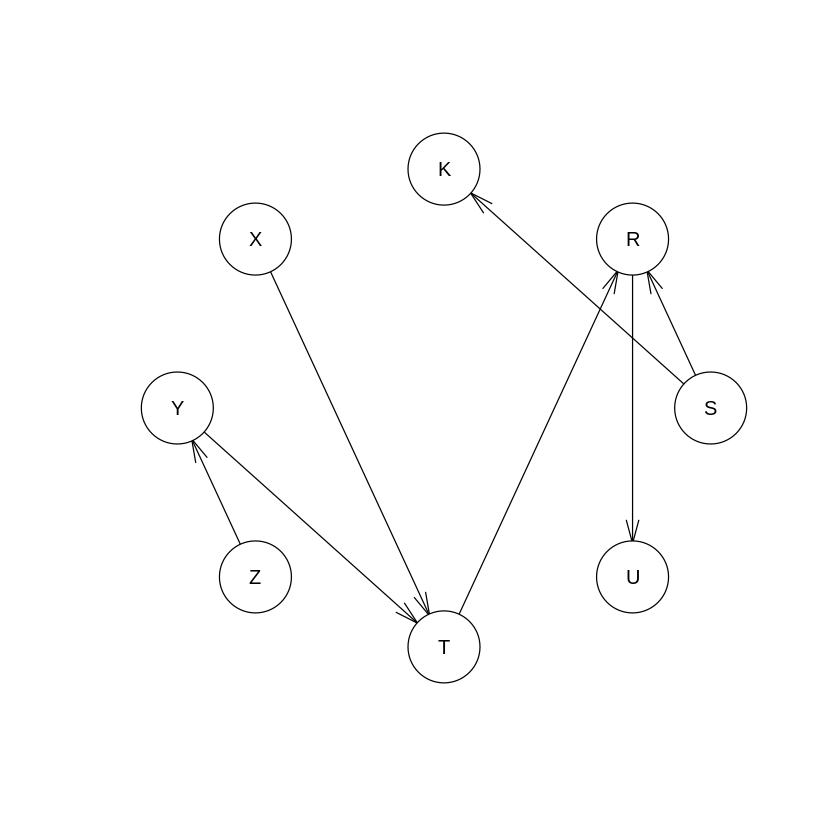

In [95]:
plot(dag.3)

In [96]:
#::GMG::Respuestas dadas en una sesi√≥n de clase
# Z ind U NO
# Z dependiente U no es seguro
# T ind U NO
# T ind U|R SI
# Z ind U |T SI
# Z ind U | T, E SI
# Z ind U | X NO
# ...
# K ind T SI v-structura y no evidenciado (R)
# K ind Z SI


## 4 Referencias

  - Guti√©rrez, J.M., Cano, R., Cofi√±o, A.S., Sordo, C., 2004. Redes probabil√≠sticas y neuronales en las ciencias atmosf√©ricas. Centro de Publicaciones, Ministerio de Medio Ambiente, Madrid, Spain.
  - Scutari, M., Denis, J.-B., 2014. Bayesian networks: with examples in R.
  - Scutari, M., 2014. Bayesian Network Constraint-Based Structure Learning Algorithms: Parallel and Optimised Implementations in the bnlearn R Package. http://arxiv.org/abs/1406.7648
  - r-bayesian-networks. http://www.r-bayesian-networks.org/ (Last accessed 18 Nov 2017)
  - Nagarajan, R., Scutari, M. and L√®bre, S. 2013. Bayesian networks in R: with applications in systems biology, Use R! Springer, New York.
